## HTTP Requests

In [1]:
import httplib2
import urllib
import requests

import webbrowser

from pprint import pprint

In [2]:
webbrowser.open('https://www.pluralsight.com')

True

##### Instantiate first request object using httplib2.Http()

In [3]:
http = httplib2.Http()

##### Inorder to make a get request to the website we simply need to invoke the request function on the http object

In [4]:
resp, data = http.request('https://www.pluralsight.com')

#### The get request using httplib2 returns two objects: a Response object with the headers of the Response and the acual content of the response. 

In [5]:
type(resp), type(data)

(httplib2.Response, bytes)

In [6]:
resp

{'date': 'Sat, 27 May 2023 03:57:06 GMT',
 'content-type': 'text/html;charset=utf-8',
 'transfer-encoding': 'chunked',
 'connection': 'keep-alive',
 'set-cookie': 'cf-ipcountry=IN; path=/; domain=www.pluralsight.com, affinity="a5b7b3cb9252aca4"; Path=/; HttpOnly, __cf_bm=fQFj2oI2S8nib2jQnasaxpmDAmPmDItiZarMbrgQpO4-1685159826-0-AcxMA+7dMU+qrVbbiT6x6j/WLPXiebJ3PVzQVqeHXRiwz5C1rjjCcDldiNE+iWwBOMVkYzh1TVAZCBTGEN8g9AU=; path=/; expires=Sat, 27-May-23 04:27:06 GMT; domain=.www.pluralsight.com; HttpOnly; Secure; SameSite=None',
 'strict-transport-security': 'max-age=31536000; includeSubDomains; preload',
 'content-security-policy': "frame-ancestors 'self' pluralsight.com pluralsight.highspot.com;",
 'x-xss-protection': '1',
 'cache-control': 'max-age=300,stale-while-revalidate=900,stale-if-error=259200',
 'last-modified': 'Sat, 27 May 2023 03:00:24 GMT',
 'expires': 'Sat, 27 May 2023 04:12:06 GMT',
 'x-vhost': 'pluralsight',
 'x-content-type-options': 'nosniff',
 'age': '0',
 'x-served-by': '

##### These are the headers returned by the website. Here the data provided is from https - the secured version of the website. We may see the original site content as mentioned below:

In [8]:
print(resp.previous)

None


In [9]:
pprint(data)

(b'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="content-type"'
 b' content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible'
 b'" content="IE=edge,chrome=1" />\n<meta content=\'width=device-width, initi'
 b"al-scale=1.0, maximum-scale=1.0, user-scalable=0' name='viewport' />\n<me"
 b'ta name="appRedirectPath" content="/id/dashboard" />\n<meta name="keyword'
 b's" />\n<meta name="description" content="Pluralsight helps organizations,'
 b' teams, and individuals build better products with online courses and data-d'
 b'riven insights that fuel skill development and improve processes." />\n<m'
 b'eta property="og:description" content="Pluralsight helps organizations, team'
 b's, and individuals build better products with online courses and data-driven'
 b' insights that fuel skill development and improve processes." />\n<meta n'
 b'ame="twitter:description" content="Pluralsight helps organizations, teams, a'
 b'nd individuals build better products with onl

##### Above is the byte version of the acual content. We may decode it:

In [10]:
html = data.decode('UTF-8')
type(html)

str

In [11]:
pprint(html)

('\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '<head>\n'
 '<meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n'
 "<meta content='width=device-width, initial-scale=1.0, maximum-scale=1.0, "
 "user-scalable=0' name='viewport' />\n"
 '<meta name="appRedirectPath" content="/id/dashboard" />\n'
 '<meta name="keywords" />\n'
 '<meta name="description" content="Pluralsight helps organizations, teams, '
 'and individuals build better products with online courses and data-driven '
 'insights that fuel skill development and improve processes." />\n'
 '<meta property="og:description" content="Pluralsight helps organizations, '
 'teams, and individuals build better products with online courses and '
 'data-driven insights that fuel skill development and improve processes." />\n'
 '<meta name="twitter:description" content="Pluralsight helps organizations, '
 'teams, and individuals build better products wi

##### Once the content is ready on the local machine, we can use regex or BS4 to parse the contents.

##### Lets make another request:

In [12]:
resp = urllib.request.urlopen('https://www.google.com/search?q=pluralsight')
print(resp.info())

HTTPError: HTTP Error 403: Forbidden

#### This is because google doesnot allow python libraries to make http requests to websites.

In [13]:
req = urllib.request.Request('https://www.google.com/search?q=pluralsight',
                             headers={'User-Agent': 'Microsoft Edge'})
resp =urllib.request.urlopen(req) 

In [14]:
type(resp)

http.client.HTTPResponse

##### Thanks to our user agent header, we got a successful connection.

##### If you want to access the headers in our response use info():

In [15]:
print(resp.info())

Content-Type: text/html; charset=ISO-8859-1
Date: Sat, 27 May 2023 04:12:15 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Security-Policy: object-src 'none';base-uri 'self';script-src 'nonce-ESAXPrqGUCopfVNP77Dp6Q' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2023-05-27-04; expires=Mon, 26-Jun-2023 04:12:15 GMT; path=/; domain=.google.com; Secure; SameSite=none
Set-Cookie: AEC=AUEFqZdDuNpzpJtPf5kWUu4DQolnKOcvm8EUfLax8Ypcc-r__8rW56UEKw; expires=Thu, 23-Nov-2023 04:12:15 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax
Set-Cookie: NID=511=hhY8Lmdn6yL9oP8TnG3EjyfclzcyCqJ6ivdJnBNX7AZjVE4gaYYUaa9WFwScfeFCcYwsb1q4iNfG04RJqVQs52TwX13gtXt9jqF1hlst98RAFfNhXMs-ngwXDjTGQ8Ws57IPjBoMnGXljStDBI2I2Z4BbiqbUW3XVD2xgpLXuOE; expires=Sun, 26-Nov-2023 04:

##### When we are using urllib to make request to a target url, the connection is closed automatically after the request is complete. 

##### The original url and status code can be accessed using the following way:

In [16]:
resp.geturl(), resp.getcode()

('https://www.google.com/search?q=pluralsight', 200)

##### If we want to eccess the content of the reposnse use read()

('<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta '
 'content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" '
 'itemprop="image"><title>pluralsight - Google Search</title><script '
 'nonce="ESAXPrqGUCopfVNP77Dp6Q">(function(){\n'
 'document.documentElement.addEventListener("submit",function(b){var '
 'a;if(a=b.target){var '
 'c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else '
 'a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var '
 'a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break '
 'a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var '
 'a=window.performance;window.start=Date.now();a:{var b=window;if(a){var '
 'c=a.timing;if(c){var '
 'd=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break '
 'a}}a.now&&(b.w
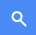

In [17]:
data = resp.read()
html = data.decode('ISO-8859-1')
pprint(html)

In [18]:
resp.read()

b''

##### We are getting nothing because connection is closed. 

#### Request python library

In [19]:
resp = requests.get('https://www.pluralsight.com/')
type(resp)

requests.models.Response

###### For status code and url property to get status of the report and target url

In [20]:
resp.status_code, resp.url

(200, 'https://www.pluralsight.com/')

##### To access the header info:

In [21]:
pprint(resp.headers)

{'Date': 'Sat, 27 May 2023 04:45:54 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'set-cookie': 'cf-ipcountry=IN; path=/; domain=www.pluralsight.com, __cf_bm=SR1zqkH7wQNR9iBS4bW028V1RWrf7.ncegHXAOlm5Ww-1685162754-0-ARqLUwuQY69nI8gBzXXbIXo4hfobssbvBJDoqU7qaHSEAHLWtEbZh5Ddd+qkuVZC9f2Evd8pDug8XT0NC/60HcQ=; path=/; expires=Sat, 27-May-23 05:15:54 GMT; domain=.www.pluralsight.com; HttpOnly; Secure; SameSite=None', 'strict-transport-security': 'max-age=31536000; includeSubDomains; preload', 'content-security-policy': "frame-ancestors 'self' pluralsight.com pluralsight.highspot.com;", 'x-xss-protection': '1', 'cache-control': 'max-age=300,stale-while-revalidate=900,stale-if-error=259200', 'last-modified': 'Sat, 27 May 2023 04:35:10 GMT', 'expires': 'Sat, 27 May 2023 04:59:20 GMT', 'x-vhost': 'pluralsight', 'X-Content-Type-Options': 'nosniff', 'Age': '94', 'X-Served-By': 'cache-hyd1100024-HYD', 'X-Cache': 'HIT', 'X-Timer': 'S168516

###### If we need to access the actual content of the resp

In [22]:
data = resp.text
pprint(data)

('\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '<head>\n'
 '<meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n'
 "<meta content='width=device-width, initial-scale=1.0, maximum-scale=1.0, "
 "user-scalable=0' name='viewport' />\n"
 '<meta name="appRedirectPath" content="/id/dashboard" />\n'
 '<meta name="keywords" />\n'
 '<meta name="description" content="Pluralsight helps organizations, teams, '
 'and individuals build better products with online courses and data-driven '
 'insights that fuel skill development and improve processes." />\n'
 '<meta property="og:description" content="Pluralsight helps organizations, '
 'teams, and individuals build better products with online courses and '
 'data-driven insights that fuel skill development and improve processes." />\n'
 '<meta name="twitter:description" content="Pluralsight helps organizations, '
 'teams, and individuals build better products wi